In [14]:
import pandas as pd
import numpy as np

df=pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X=df.drop('BurnoutRisk',axis=1)
y=df['BurnoutRisk']
X=pd.get_dummies(X)
scaler=StandardScaler()
numeric_cols=X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols]=scaler.fit_transform(X[numeric_cols])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
train_lda_x=lda.fit_transform(X_train,y_train)
test_lda_x=lda.transform(X_test)
print(train_lda_x.shape)

model=LogisticRegression(max_iter=1000)
model.fit(train_lda_x,y_train)
y_pred=model.predict(test_lda_x)

accuracy=accuracy_score(y_test,y_pred)
confusionmatrix=confusion_matrix(y_test,y_pred)

print("Logistic Regression Trained with LDA")
print(f"Accuracy of model is:{accuracy}")
print(f"Confusion Matrix:{confusionmatrix}")

(2400, 1)
Logistic Regression Trained with LDA
Accuracy of model is:0.9833333333333333
Confusion Matrix:[[392   7]
 [  3 198]]


In [30]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)

print("Logistic Regression Trained without LDA")
print(f"Accuracy of model is:{accuracy}")
print(f"Confusion Matrix:{confusion}")

Logistic Regression Trained without LDA
Accuracy of model is:0.99
Confusion Matrix:[[395   4]
 [  2 199]]


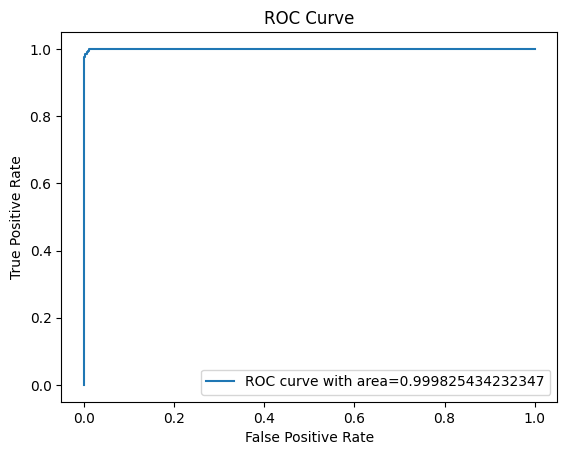

In [33]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
yprobability=model.predict_proba(X_test)[:,1]
f,t,thresholds=roc_curve(y_test,yprobability)
auc=auc(f,t)
plt.plot(f,t,label=f'ROC curve with area={auc}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()